### Notre objectif est de réaliser un code permettant de classifier des données entre spam et non spam

In [1]:
#importation des principales librairies pour l'annalyse
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd
import re

In [2]:
#importation du dataset
data=pd.read_csv("D://codes//ia//data//spam.csv", encoding_errors="replace")
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will �_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
#transformation de la colonne v1 pour avoir des chiffres représentant chaque catégorie
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
data['v1'] = encoder.fit_transform(data['v1'])

In [4]:
data.describe()

,v1
count,5572.000000
mean,0.134063
std,0.340751
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   int32 
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: int32(1), object(4)
memory usage: 196.0+ KB


In [6]:
data.rename(columns = {'v1': 'target', 'v2': 'text'}, inplace = True)

In [7]:
data["target"].unique()

array([0, 1])

#### Ici 1 représente les spams, et 0 les non spam

In [8]:
data.isnull().sum()

target           0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [9]:
data.duplicated().sum()

403

In [10]:
#suppression des doubblons
data = data.drop_duplicates(keep = 'first')

In [11]:
data.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_12776\1191422558.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace = True)


In [12]:
#réorganisation du dataset
data = data.reset_index(drop=True)
data


,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...
5165,0,Will �_ b going to esplanade fr home?
5166,0,"Pity, * was in mood for that. So...any other s..."
5167,0,The guy did some bitching but I acted like i'd...


In [13]:
# Parcourir chaque ligne
for i in range(len(data)):
        # Texte à analyser (deuxième colonne, index 1)
        combined = str(data.iloc[i, 1]) if pd.notna(data.iloc[i, 1]) else ""

# Longueur du texte
        data.loc[i, 'Longueur'] = len(combined)
    
# Nombre de caractères non-anglais (hors A-Za-z0-9,.?!)
        non_english_chars = re.findall(r'[^A-Za-z0-9,.?! ;"\')\(]', combined)
        data.loc[i, 'Caractères_non_anglais'] = len(non_english_chars)

# Longueur de la plus longue séquence de chiffres
        digit_sequences = re.findall(r'\d+', combined)  # Trouver toutes les séquences de chiffres
        if digit_sequences:
            data.loc[i, 'Longueur_séquence_chiffres'] = len(max(digit_sequences, key=len))
        else:
            data.loc[i, 'Longueur_séquence_chiffres'] = 0

        non_english_chars = re.findall(r'[^A-Za-z0-9,.?!]', combined)
        data.loc[i, 'Caractères_non_anglais'] = len(non_english_chars)
    
# Nombre d'adresses email
        emails = re.findall(r'\b[\w\.-]+@[\w\.-]+\.\w{2,4}\b', combined)
        data.loc[i, 'Email'] = len(emails)
    
# Nombre de numéros de téléphone (séquences de 8 à 15 chiffres)
        phone_numbers = re.findall(r'\b\d{8,15}\b', combined)
        data.loc[i, 'Numéro_téléphone'] = len(phone_numbers)
    
# Longueur de la plus longue séquence de chiffres
        digit_sequences = re.findall(r'\d+', combined)
        data.loc[i, 'Longueur_séquence_chiffres'] = len(max(digit_sequences, key=len)) if digit_sequences else 0
    
# Nombre de séquences de majuscules (2 lettres ou plus)
        maj_seq = re.findall(r'[A-Z]{2,}', combined)
        data.loc[i, 'Séquences_majuscules'] = len(maj_seq)

# Afficher un aperçu pour vérification
print("Aperçu du résultat :\n", data.head())


Aperçu du résultat :
    target                                               text  Longueur  \
0       0  Go until jurong point, crazy.. Available only ...     111.0   
1       0                      Ok lar... Joking wif u oni...      29.0   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...     155.0   
3       0  U dun say so early hor... U c already then say...      49.0   
4       0  Nah I don't think he goes to usf, he lives aro...      61.0   

   Caractères_non_anglais  Longueur_séquence_chiffres  Email  \
0                    19.0                         0.0    0.0   
1                     5.0                         0.0    0.0   
2                    32.0                        11.0    0.0   
3                    10.0                         0.0    0.0   
4                    13.0                         0.0    0.0   

   Numéro_téléphone  Séquences_majuscules  
0               0.0                   0.0  
1               0.0                   0.0  
2               

In [14]:
data.head()

,target,text,Longueur,Caractères_non_anglais,Longueur_séquence_chiffres,Email,Numéro_téléphone,Séquences_majuscules
0,0,"Go until jurong point, crazy.. Available only ...",111.0,19.0,0.0,0.0,0.0,0.0
1,0,Ok lar... Joking wif u oni...,29.0,5.0,0.0,0.0,0.0,0.0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,32.0,11.0,0.0,0.0,2.0
3,0,U dun say so early hor... U c already then say...,49.0,10.0,0.0,0.0,0.0,0.0
4,0,"Nah I don't think he goes to usf, he lives aro...",61.0,13.0,0.0,0.0,0.0,0.0


In [15]:
#debut de l'analyse de nos données

In [16]:
print(data.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5169 entries, 0 to 5168
Data columns (total 8 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   target                      5169 non-null   int32  
 1   text                        5169 non-null   object 
 2   Longueur                    5169 non-null   float64
 3   Caractères_non_anglais      5169 non-null   float64
 4   Longueur_séquence_chiffres  5169 non-null   float64
 5   Email                       5169 non-null   float64
 6   Numéro_téléphone            5169 non-null   float64
 7   Séquences_majuscules        5169 non-null   float64
dtypes: float64(6), int32(1), object(1)
memory usage: 303.0+ KB
None


In [17]:
# Statistiques descriptives sur les données numériques
data.describe()

,target,Longueur,Caractères_non_anglais,Longueur_séquence_chiffres,Email,Numéro_téléphone,Séquences_majuscules
count,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.923776,15.917392,1.133488,0.001161,0.070613,0.661056
std,0.332253,58.174846,12.516303,2.914609,0.034054,0.278634,2.555429
min,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,36.000000,7.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,60.000000,12.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,117.000000,23.000000,1.000000,0.000000,0.000000,0.000000
max,1.000000,910.000000,211.000000,14.000000,1.000000,2.000000,32.000000


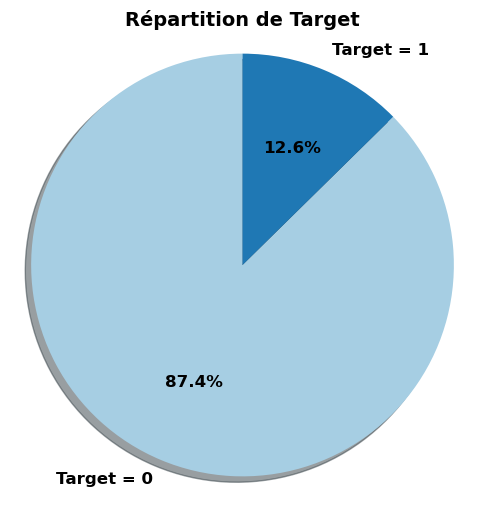

In [18]:
plt.figure(figsize=(6, 6))
target_counts = data['target'].value_counts()
labels = ['Target = 0', 'Target = 1']
colors_pie = sns.color_palette('Paired', 2)  # Deux couleurs de Paired
plt.pie(target_counts, labels=labels, colors=colors_pie, autopct='%1.1f%%', startangle=90,
        shadow=True, textprops={'fontsize': 12, 'fontweight': 'bold'})
plt.title('Répartition de Target', fontsize=14, fontweight='bold')
plt.axis('equal')  # Pour un cercle parfait
plt.show()

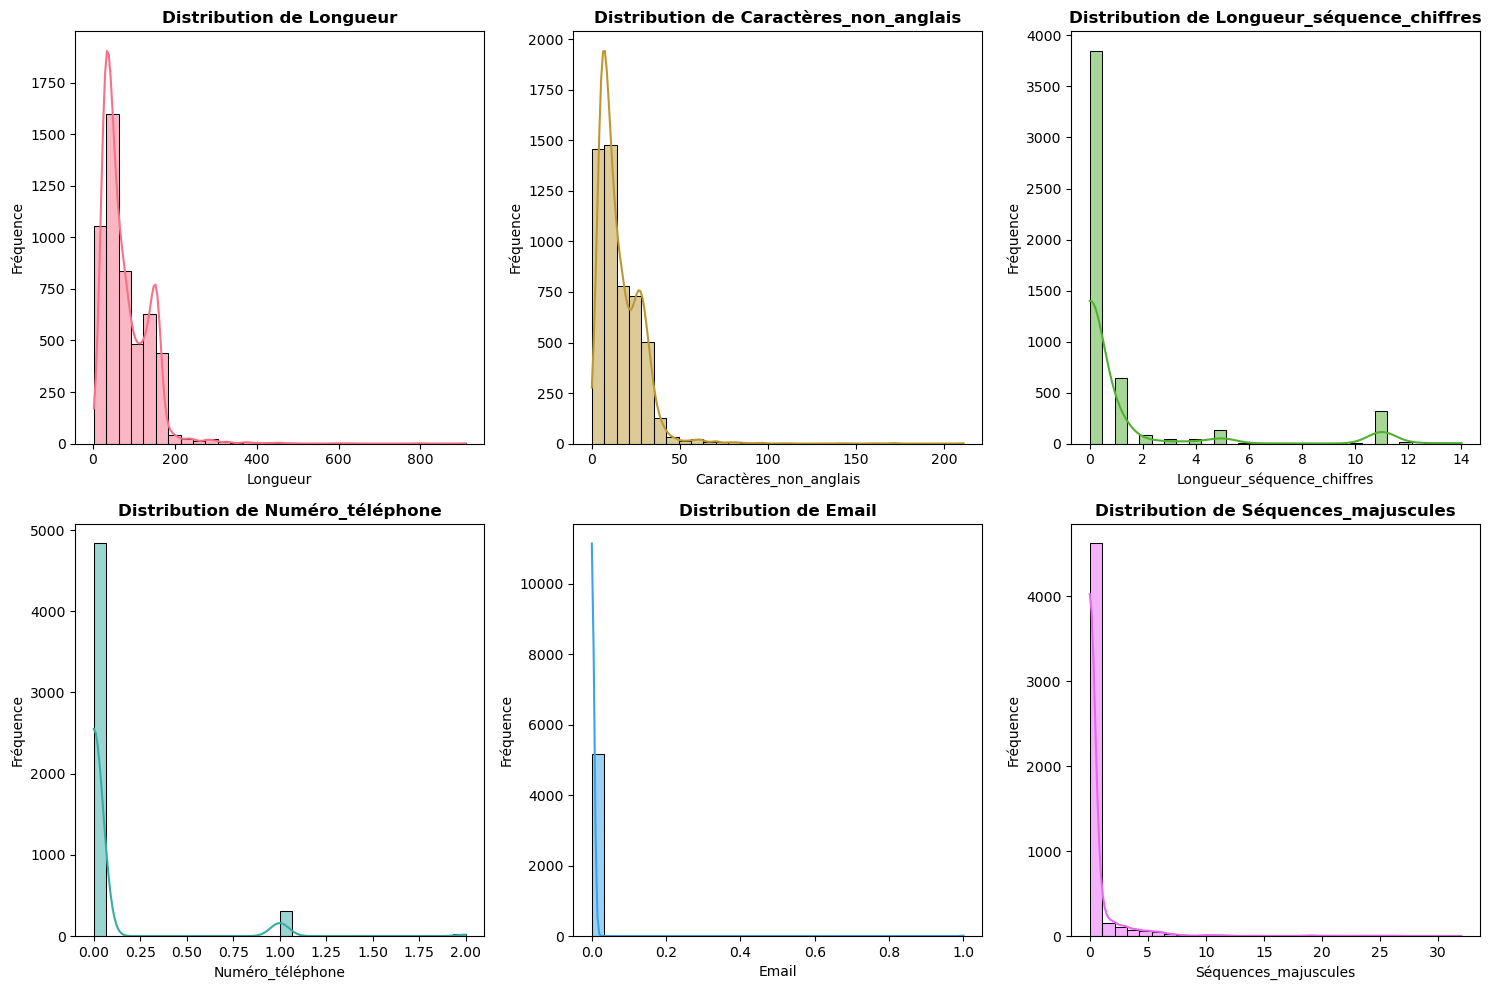

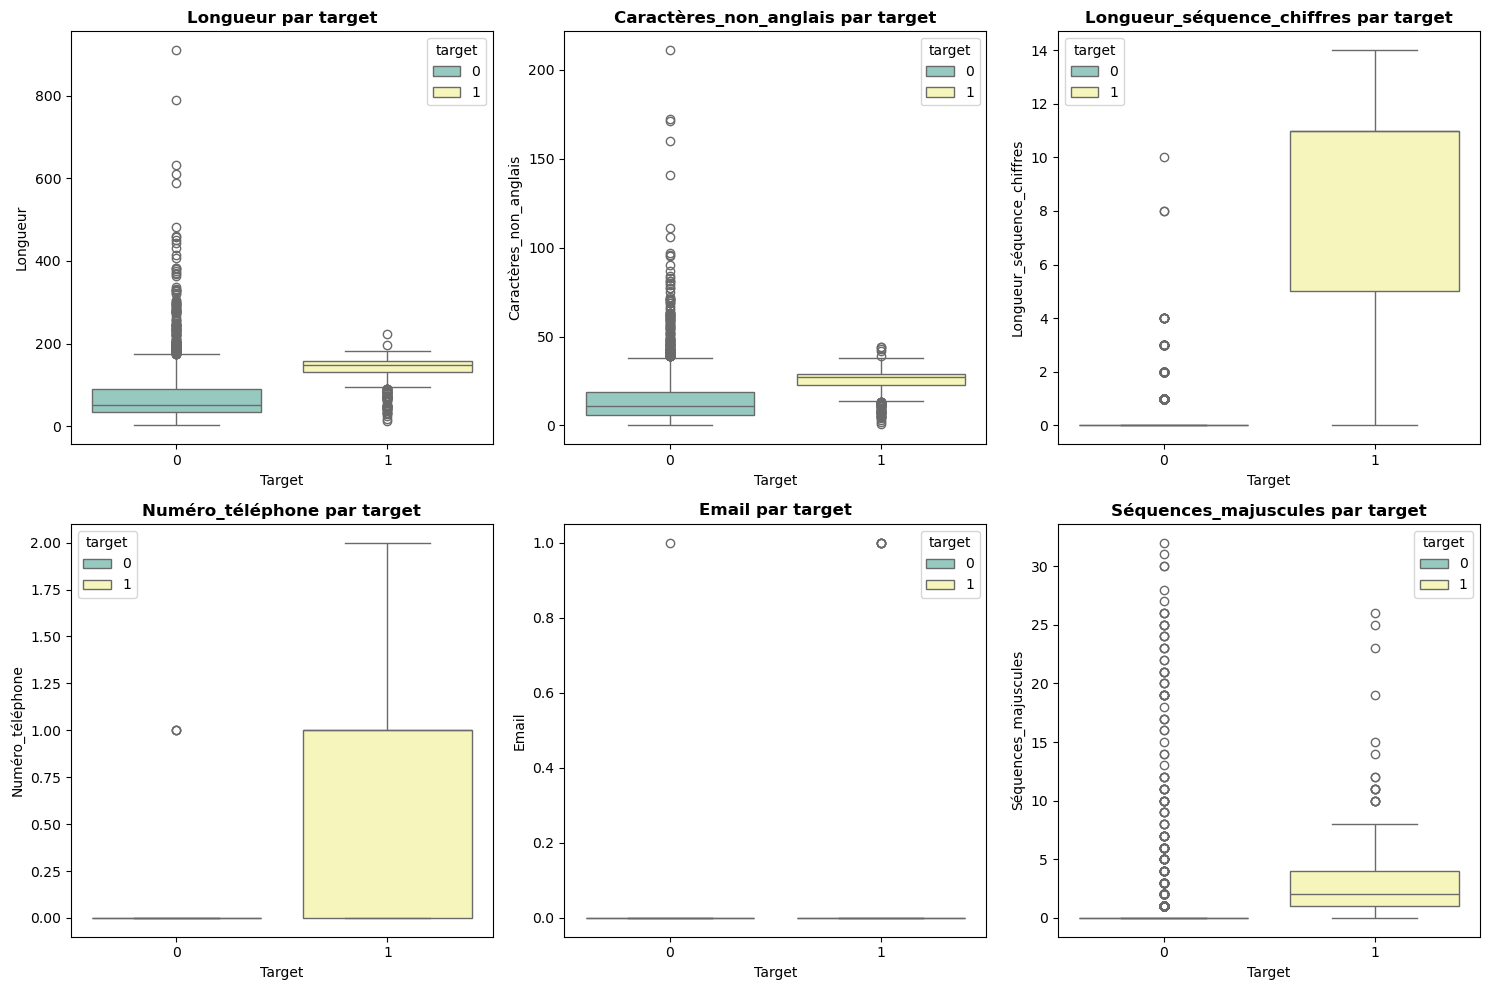

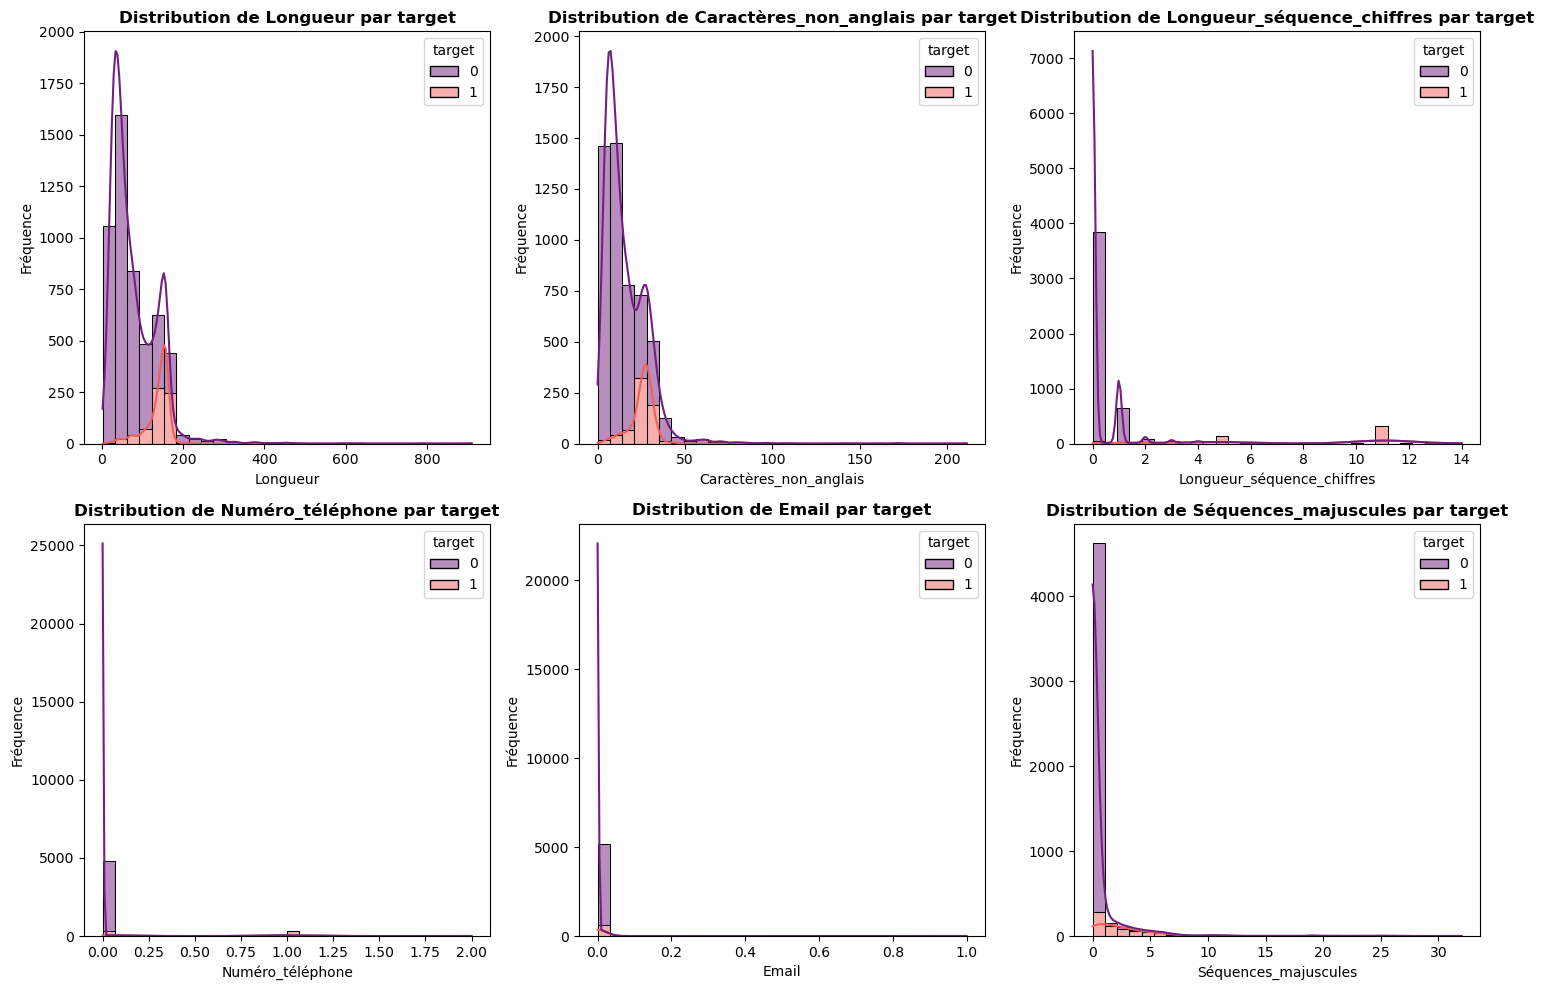

In [19]:
# Liste des variables à analyser
variables = [
    'Longueur',
    'Caractères_non_anglais',
    'Longueur_séquence_chiffres',
    'Numéro_téléphone',
    'Email',
    'Séquences_majuscules'
]

# Définir une palette de couleurs cool pour les histogrammes individuels
colors = sns.color_palette("husl", len(variables))  # Palette vibrante pour chaque variable

# Visualisation : histogrammes pour chaque variable
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data[var], bins=30, kde=True, color=colors[i-1], edgecolor='black')
    plt.title(f'Distribution de {var}', fontsize=12, fontweight='bold')
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Fréquence', fontsize=10)
plt.tight_layout()
plt.show()

# 2. Analyse en fonction de target

# Visualisation : boxplots par catégorie de target
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='target', y=var, data=data, palette='Set3',hue='target')  # Palette Set3 pour contraste
    plt.title(f'{var} par target', fontsize=12, fontweight='bold')
    plt.xlabel('Target', fontsize=10)
    plt.ylabel(var, fontsize=10)
plt.tight_layout()
plt.show()

# Visualisation : histogrammes par catégorie de target dans une grille de subplots
plt.figure(figsize=(15, 10))
for i, var in enumerate(variables, 1):
    plt.subplot(2, 3, i)
    sns.histplot(data=data, x=var, hue='target', bins=30, kde=True, multiple='stack',
                 palette='magma')  # Palette magma pour des couleurs modernes
    plt.title(f'Distribution de {var} par target', fontsize=12, fontweight='bold')
    plt.xlabel(var, fontsize=10)
    plt.ylabel('Fréquence', fontsize=10)
plt.tight_layout()
plt.show()

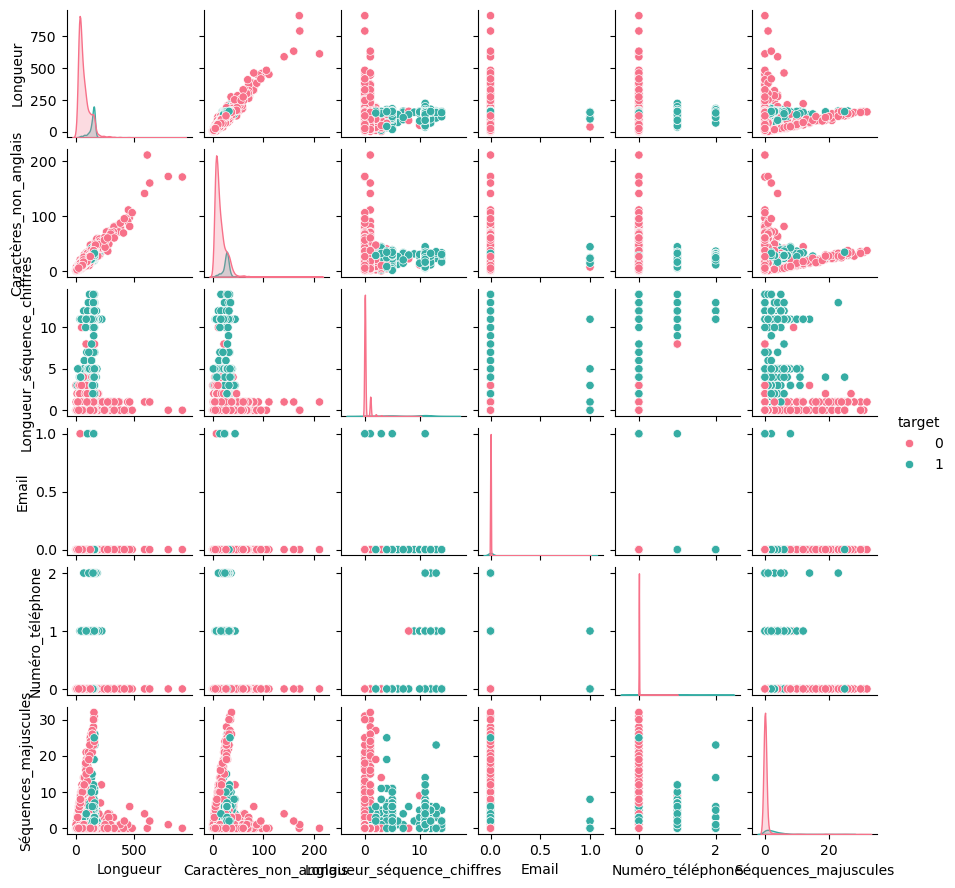

In [20]:
sns.pairplot(data,height=1.5,palette='husl',hue='target')

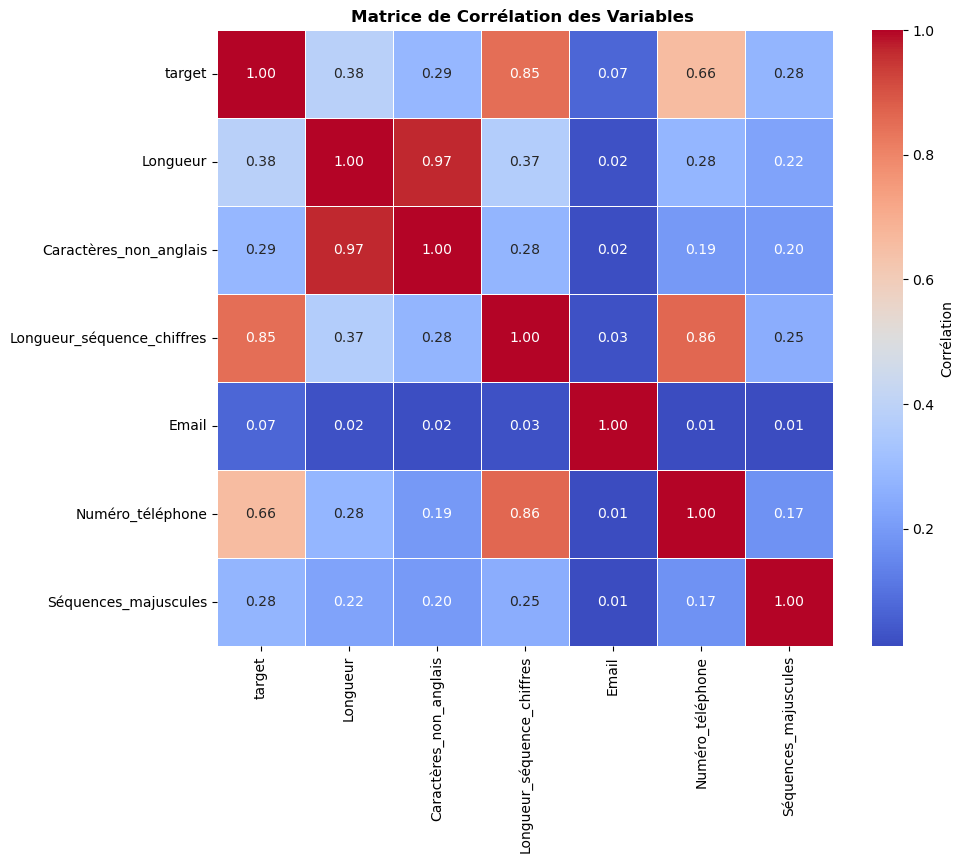

In [21]:

numeric_cols = [col for col in data.columns if data[col].dtype in ['int64', 'int32','float64']]

# Calculer la matrice de corrélation
corr_matrix = data[numeric_cols].corr()

# Créer la heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, 
            cbar_kws={'label': 'Corrélation'}, linewidths=0.5)
plt.title('Matrice de Corrélation des Variables ', fontsize=12, fontweight='bold')
plt.show()

In [22]:
# nous devrions donc désormais, etre en mesure de créer notre premier outil de classification

##### L'observation des données présentées nous permet de déduire une supposer que nos données forment des classes distinctes facilement séparables. Nous utiliserons l'algorthme du plus proche  voisin, parceque c'est simple, plutot rapide et q'il devrait se montrer plutot efficace vu le type et le nombre de données 

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [24]:
# Splitting the data into a training set and a test set
cols_to_exclude = [data.columns[0],data.columns[1]]
features = [col for col in data.columns if col not in cols_to_exclude and col != 'target']
X = data[features]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [25]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from math import sqrt
train_preds = model.predict(X_train)
mse = mean_squared_error(y_train, train_preds)
rmse = sqrt(mse)
rmse

0.13300124481435105

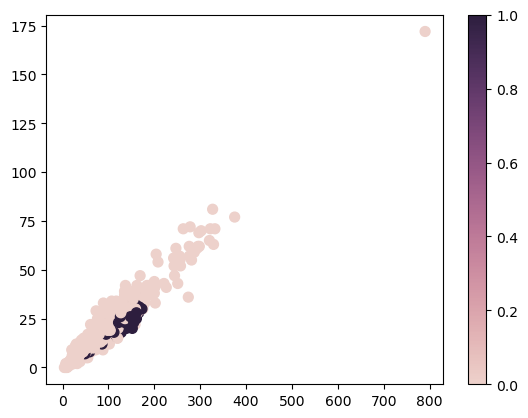

In [27]:
test_preds = model.predict(X_test)
cmap = sns.cubehelix_palette(as_cmap=True)
f, ax = plt.subplots()
points = ax.scatter(
X_test.iloc[:, 0], X_test.iloc[:, 1], c=test_preds, s=50, cmap=cmap)
f.colorbar(points)
plt.show()

In [28]:
from sklearn.model_selection import GridSearchCV
parameters = {"n_neighbors": range(1, 50)}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})

In [29]:
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
accuracy_train=accuracy_score(y_train, train_preds_grid)
accuracy_test=accuracy_score(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
print("train_rmse ",train_rmse)
print('test rmse ',test_rmse)
print('accuracy_train ',accuracy_train)
print("accuracy_test ",accuracy_test)

train_rmse  0.13300124481435105
test rmse  0.17033361280686066
accuracy_train  0.982310668877833
accuracy_test  0.9709864603481625


In [30]:
parameters = {"n_neighbors": range(1, 50),"weights": ["uniform", "distance"],}
gridsearch = GridSearchCV(KNeighborsClassifier(), parameters)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})
print(gridsearch.best_params_)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
test_rmse


{'n_neighbors': 3, 'weights': 'uniform'}


0.17033361280686066

In [31]:
best_k = gridsearch.best_params_["n_neighbors"]
best_weights = gridsearch.best_params_["weights"]
bagged_knn = KNeighborsClassifier(n_neighbors=best_k, weights=best_weights)

In [32]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

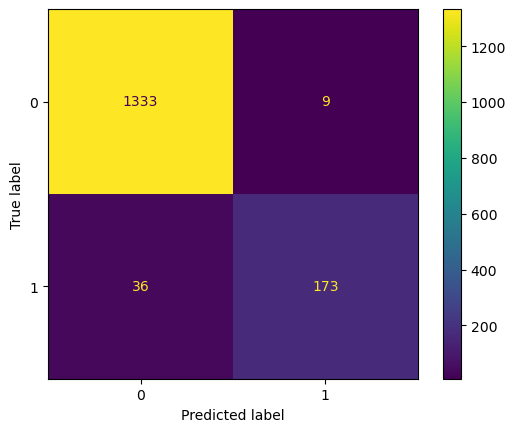

In [33]:
cm=confusion_matrix(y_test, test_preds_grid)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

##### En considérant la matrice de confusion, les résultats obtenus sont plutot bons, 9 messages etant des spam ont été mal classé et 36 messages étant des spams ont été classés comme non spams, essayons cependant d'améliorer légèrement notre modèle pour réduire les faux positifs et les faux négatifs

Pour cela, nous allons dans ce modèle sélectionner les mots les plus récurents et spécifiques à la classe des spams, et les compter pour chaque phrase. Ce nouveau compte sera un nouveau paramètre pour notre modèle

In [34]:
from collections import Counter
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import pandas as pd
import nltk

In [35]:
from collections import Counter
import pandas as pd
import re

for cat in data['target'].unique():
    # Extraire les textes de la catégorie
    textes_cat = data[data['target'] == cat]['text']
    # Combiner les textes en une seule chaîne
    texte_combine = " ".join(textes_cat).lower()
    # Diviser en mots
    mots = texte_combine.split()
    # Filtrer : garder les mots alphabétiques uniquement (enlever ponctuation, chiffres, etc.)
    mots = [m for m in mots if re.match(r'^[a-zA-Z]+$', m)]
    
    # Nombre total de mots valides
    total_mots = len(mots)
    
    # Compter les mots et prendre les 20 plus fréquents
    top_mots = Counter(mots).most_common(60)
    
    # Afficher les résultats
    print(f"\nCatégorie: {cat}")
    print(f"Total mots (après filtrage): {total_mots}")
    print(", ".join([f"{mot} ({freq}, {freq/total_mots:.4%})" for mot, freq in top_mots]))


Catégorie: 0
Total mots (après filtrage): 51004
i (2063, 4.0448%), you (1606, 3.1488%), to (1464, 2.8704%), the (1042, 2.0430%), a (953, 1.8685%), and (815, 1.5979%), u (794, 1.5567%), in (726, 1.4234%), my (666, 1.3058%), is (628, 1.2313%), me (559, 1.0960%), for (471, 0.9235%), of (471, 0.9235%), that (430, 0.8431%), it (418, 0.8195%), have (417, 0.8176%), but (395, 0.7744%), are (388, 0.7607%), so (387, 0.7588%), your (377, 0.7392%), on (358, 0.7019%), not (355, 0.6960%), at (354, 0.6941%), can (338, 0.6627%), be (318, 0.6235%), if (310, 0.6078%), do (308, 0.6039%), will (305, 0.5980%), we (286, 0.5607%), get (285, 0.5588%), just (273, 0.5353%), when (250, 0.4902%), with (245, 0.4804%), how (243, 0.4764%), up (242, 0.4745%), go (227, 0.4451%), what (227, 0.4451%), got (221, 0.4333%), or (218, 0.4274%), all (215, 0.4215%), this (213, 0.4176%), like (212, 0.4157%), no (209, 0.4098%), was (200, 0.3921%), come (199, 0.3902%), know (197, 0.3862%), ur (195, 0.3823%), am (191, 0.3745%), t

In [36]:
words_significants=["call", "free","txt", "text","mobile","reply","claim","stop","now","won","get","just","new","send", "contact","only","prize","cash","win","service","per","customer","latest"]

In [37]:
def count_significant_words(texte):
    # Gérer les cas où texte est une liste ou une chaîne
    if isinstance(texte, list):
        texte = " ".join(str(m) for m in texte).lower()
    else:
        texte = str(texte).lower()
    
    # Extraire les mots alphabétiques
    mots = re.findall(r'\b[a-zA-Z]+\b', texte)
    
    # Compter les mots significatifs
    
    return sum(1 for mot in mots if mot in words_significants)

# Ajouter une nouvelle colonne à data
data['significant_words_count'] = data['text'].apply(count_significant_words)



In [38]:
data

,target,text,Longueur,Caractères_non_anglais,Longueur_séquence_chiffres,Email,Numéro_téléphone,Séquences_majuscules,significant_words_count
0,0,"Go until jurong point, crazy.. Available only ...",111.0,19.0,0.0,0.0,0.0,0.0,1
1,0,Ok lar... Joking wif u oni...,29.0,5.0,0.0,0.0,0.0,0.0,0
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155.0,32.0,11.0,0.0,0.0,2.0,4
3,0,U dun say so early hor... U c already then say...,49.0,10.0,0.0,0.0,0.0,0.0,0
4,0,"Nah I don't think he goes to usf, he lives aro...",61.0,13.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
5164,1,This is the 2nd time we have tried 2 contact u...,160.0,32.0,12.0,0.0,1.0,2.0,7
5165,0,Will �_ b going to esplanade fr home?,37.0,9.0,0.0,0.0,0.0,0.0,0
5166,0,"Pity, * was in mood for that. So...any other s...",57.0,10.0,0.0,0.0,0.0,0.0,0
5167,0,The guy did some bitching but I acted like i'd...,125.0,26.0,0.0,0.0,0.0,0.0,1


In [39]:
cols_to_exclude = [data.columns[0],data.columns[1]]
features = [col for col in data.columns if col not in cols_to_exclude and col != 'target']
X = data[features]
y = data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
gridsearch.fit(X_train, y_train)
GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': range(1, 50),
                         'weights': ['uniform', 'distance']})
train_preds_grid = gridsearch.predict(X_train)
train_mse = mean_squared_error(y_train, train_preds_grid)
train_rmse = sqrt(train_mse)
test_preds_grid = gridsearch.predict(X_test)
test_mse = mean_squared_error(y_test, test_preds_grid)
accuracy_train=accuracy_score(y_train, train_preds_grid)
accuracy_test=accuracy_score(y_test, test_preds_grid)
test_rmse = sqrt(test_mse)
print(train_rmse)
print(test_rmse)
print(accuracy_train)
print(accuracy_test)

0.02351152052861994
0.15857196378382651
0.9994472084024323
0.9748549323017408


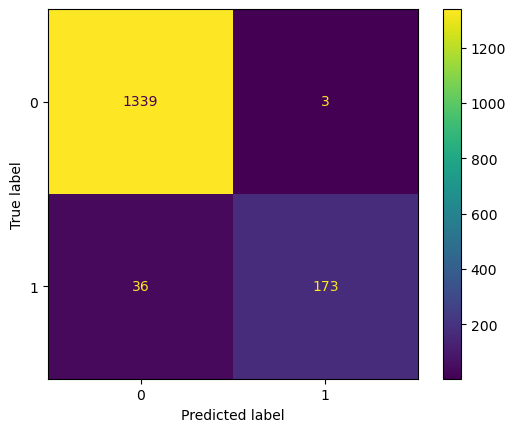

In [40]:
cm=confusion_matrix(y_test, test_preds_grid)
disp=ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

#### On constate une nette amélioration de notre modèle, surtout au niveau des messages importants classés comme spam